In [27]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"

df = pd.read_excel(url, header=1)

df.head()  # <-- print() ishlatma, shunda jadval ko‘rinadi (rangli)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [31]:
# Bo'sh qiymatlar sonini tekshirish
print(df.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [33]:
# ustun nomlarini soddalashtirish
df.columns = df.columns.str.strip().str.lower().str.replace(" ","_")

In [39]:
df.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [41]:
df = df.drop(columns=['id'])

df.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [49]:
# bunda ML ga kiramiz chunki bizga Y o'qimiz default va X qolgan qismlarni o'z ichiga olmoqda

X = df.drop(columns=['default_payment_next_month'])
Y = df['default_payment_next_month']

In [53]:
# Ma’lumotni o‘qitish va sinov uchun ajratamiz:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [63]:
# Agar ustunlarda miqdoriy qiymatlar bo‘lsa, normalizatsiya qilamiz:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
# Model tanlash va o‘qitish
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, Y_train)


LogisticRegression()

In [72]:
# Modelni baholash. AUC, accuracy, va classification report bilan:
from sklearn.metrics import classification_report, roc_auc_score
Y_pred = model.predict(X_test_scaled)
print(classification_report(Y_test, Y_pred))
print("AUC:", roc_auc_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000

AUC: 0.6037095035757863


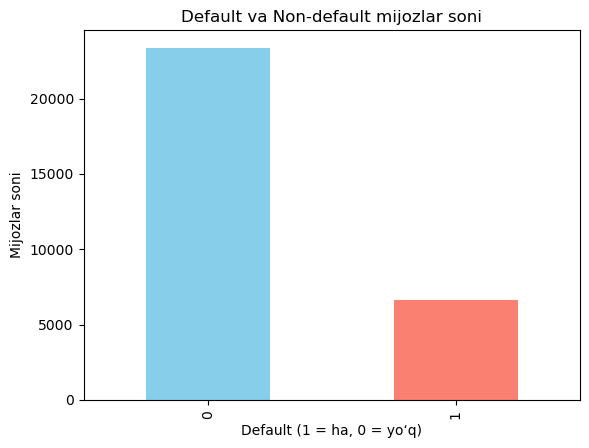

In [74]:
import matplotlib.pyplot as plt

df['default_payment_next_month'].value_counts().plot(
    kind='bar', color=['skyblue', 'salmon']
)
plt.title('Default va Non-default mijozlar soni')
plt.xlabel('Default (1 = ha, 0 = yo‘q)')
plt.ylabel('Mijozlar soni')
plt.show()

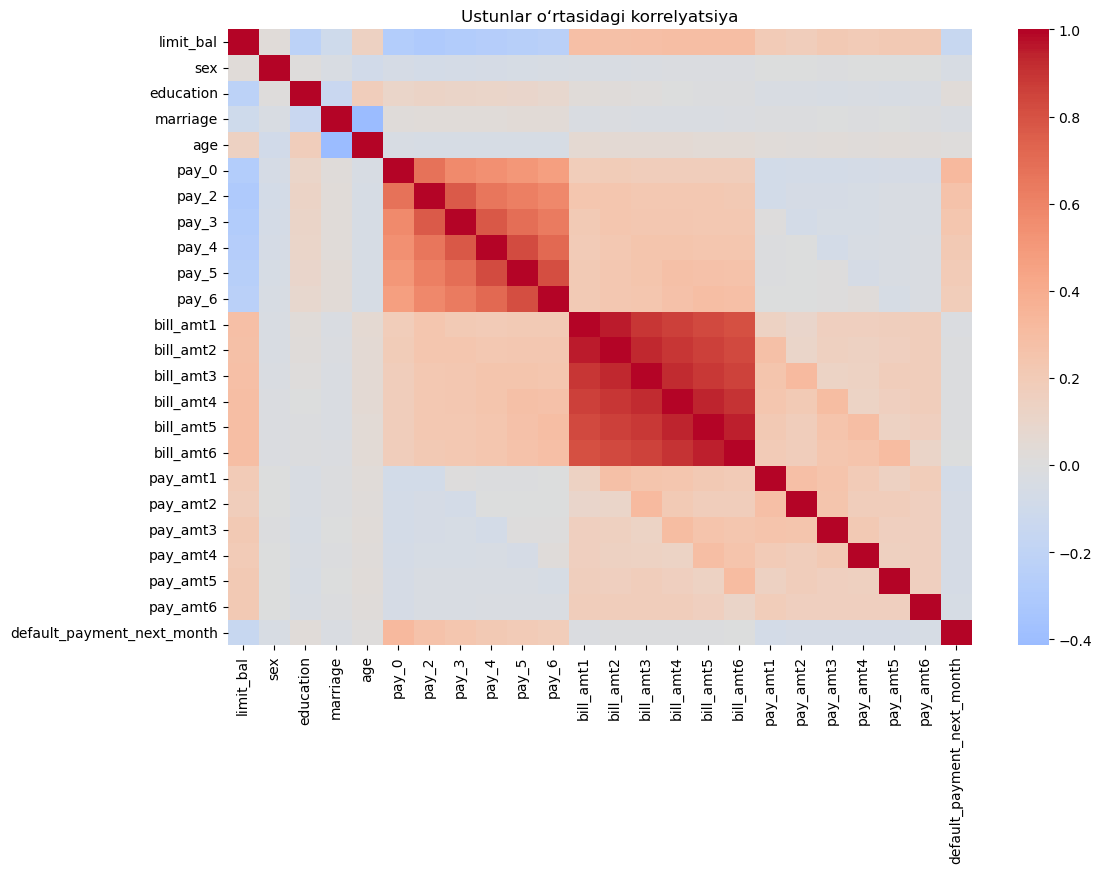

In [76]:
import seaborn as sns

plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Ustunlar o‘rtasidagi korrelyatsiya')
plt.show()

In [80]:
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
df[pay_cols + ['default_payment_next_month']].groupby('default_payment_next_month').mean()


,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
default_payment_next_month,,,,,,
0,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,-0.405624
1,0.668174,0.458258,0.362116,0.254521,0.167872,0.112116


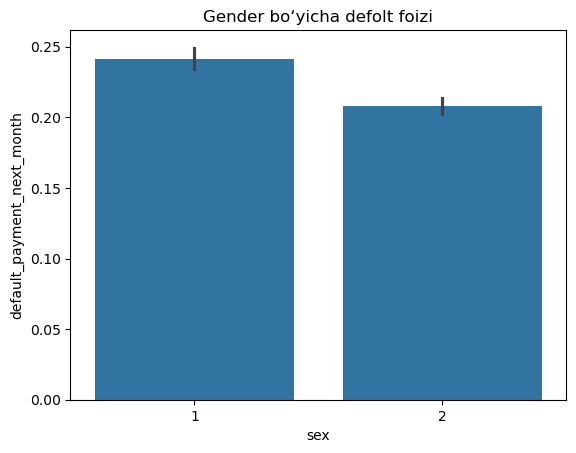

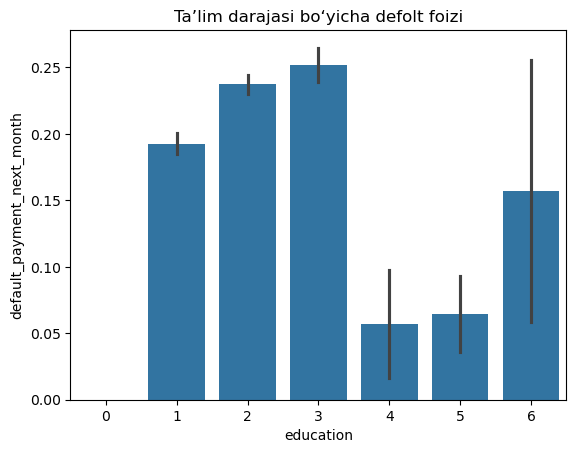

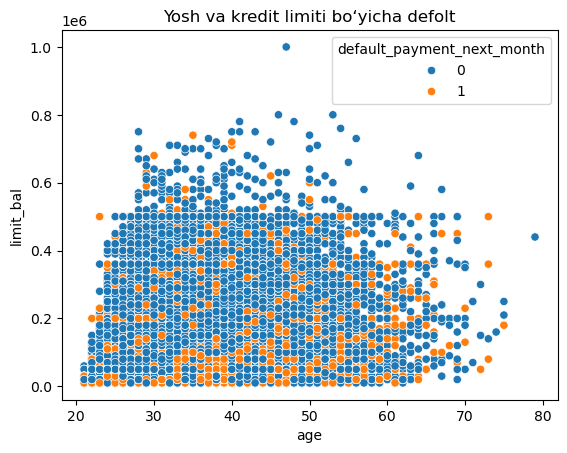

In [86]:
sns.barplot(x='sex', y='default_payment_next_month', data=df)
plt.title('Gender bo‘yicha defolt foizi')
plt.show()

sns.barplot(x='education', y='default_payment_next_month', data=df)
plt.title('Ta’lim darajasi bo‘yicha defolt foizi')
plt.show()

sns.scatterplot(x='age', y='limit_bal', hue='default_payment_next_month', data=df)
plt.title('Yosh va kredit limiti bo‘yicha defolt')
plt.show()


In [88]:
# Modelni saqlash (pickle yoki joblib)
import joblib
joblib.dump(model, "credit_default_model.pkl")

['credit_default_model.pkl']